<a href="https://colab.research.google.com/github/piotrciechowicz/aI_for_the_Industry_4.0/blob/main/AI_for_the_Industry_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor

#Functions

In [294]:
def prediction_model (model, X_train, X_test_1, X_test_2, y_train, y_train_1, y_train_2):
  model.fit(X_train, y_train)
  y_pred_1 = model.predict(X_test_1)
  y_pred_2 = model.predict(X_test_2)
  r2_1 = r2_score(y_test_1, y_pred_1)
  MSE_1 = mean_squared_error(y_test_1, y_pred_1)
  print(f"Model: {model}, Sesion number: {num_test[0]}, R2 score: {r2_1}, MSE: {MSE_1}")
  print()
  r2_2 = r2_score(y_test_2, y_pred_2)
  MSE_2 = mean_squared_error(y_test_2, y_pred_2)
  print(f"Model: {model}, Sesion number: {num_test[1]}, R2 score: {r2_2}, MSE: {MSE_2}")
  print()
  fig, ax = plt.subplots(figsize=(15,7))
  ax.plot(y_test_1['wavelength_izopropanol'], y_test_1['amplitude_izopropanol'], color='green', label = 'izopropanol')
  ax.plot(y_test_1['wavelength_water'], y_test_1['amplitude_water'], color='blue', label = 'water')
  ax.plot(y_pred_1[:,0], y_pred_1[:,1], color='red', label = 'predicted_izopropanol')
  ax.plot(y_pred_1[:,2], y_pred_1[:,3], color='orange', label = 'predicted_water')
  ax.xaxis.set_tick_params(rotation=90)
  ax.set_title(f'Sensor nr {num_test[0]}')
  ax.set_xlabel('wavelength [nm]')
  ax.set_ylabel('amplitude [dB]')
  ax.legend()
  plt.show()
  print()
  fig, ax = plt.subplots(figsize=(15,7))
  ax.plot(y_test_2['wavelength_izopropanol'], y_test_2['amplitude_izopropanol'], color='green', label = 'izopropanol')
  ax.plot(y_test_2['wavelength_water'], y_test_2['amplitude_water'], color='blue', label = 'water')
  ax.plot(y_pred_2[:,0], y_pred_2[:,1], color='red', label = 'predicted_izopropanol')
  ax.plot(y_pred_2[:,2], y_pred_2[:,3], color='orange', label = 'predicted_water')
  ax.xaxis.set_tick_params(rotation=90)
  ax.set_title(f'Sensor nr {num_test[1]}')
  ax.set_xlabel('wavelength [nm]')
  ax.set_ylabel('amplitude [dB]')
  ax.legend()
  plt.show()
  new_row = {'model':model,'r2_1' : r2_1,'r2_2' : r2_2,'MSE_1' : MSE_1,'MSE_2' : MSE_2}
  
  print()
  return new_row

#Importing dataset

In [295]:
env = ['air','izopropanol','water']

In [296]:
df_air = pd.DataFrame()
df_izopropanol = pd.DataFrame()
df_water = pd.DataFrame()

for item in env:
  for sesion in range(1,11):
    if item == 'air':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}_{sesion}',f'amplitude_{item}_{sesion}'])
        df_air = pd.concat([df_air,df_1], axis="columns")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}_{sesion}',f'amplitude_{item}_{sesion}'])
        df_air = pd.concat([df_air,df_1], axis="columns")
    elif item == 'izopropanol':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}_{sesion}',f'amplitude_{item}_{sesion}'])
        df_izopropanol = pd.concat([df_izopropanol,df_1], axis="columns")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}_{sesion}',f'amplitude_{item}_{sesion}'])
        df_izopropanol = pd.concat([df_izopropanol,df_1], axis="columns")
    elif item == 'water':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}_{sesion}',f'amplitude_{item}_{sesion}'])
        df_water = pd.concat([df_water,df_1], axis="columns")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}_{sesion}',f'amplitude_{item}_{sesion}'])
        df_water = pd.concat([df_water,df_1], axis="columns")


In [297]:
display(df_air.sample(3))
print()
display(df_izopropanol.sample(3))
print()
display(df_water.sample(3))

,wavelength_air_1,amplitude_air_1,wavelength_air_2,amplitude_air_2,wavelength_air_3,amplitude_air_3,wavelength_air_4,amplitude_air_4,wavelength_air_5,amplitude_air_5,wavelength_air_6,amplitude_air_6,wavelength_air_7,amplitude_air_7,wavelength_air_8,amplitude_air_8,wavelength_air_9,amplitude_air_9,wavelength_air_10,amplitude_air_10
1144,0.000001,0.9117,0.000001,1.6123,0.000001,-0.51067,0.000001,0.42688,0.000001,2.10460,0.000001,2.05870,0.000001,0.64153,0.000001,1.7030,0.000001,0.48000,0.000001,1.1161
2620,0.000002,1.8036,0.000002,1.7155,0.000002,0.29208,0.000002,-0.52445,0.000002,0.84916,0.000002,0.55462,0.000002,1.13310,0.000002,1.6625,0.000002,0.69461,0.000002,1.5836
669,0.000001,5.4782,0.000001,6.0879,0.000001,4.16770,0.000001,4.59850,0.000001,6.09670,0.000001,5.96990,0.000001,5.03540,0.000001,6.2175,0.000001,4.97000,0.000001,5.6462


,wavelength_izopropanol_1,amplitude_izopropanol_1,wavelength_izopropanol_2,amplitude_izopropanol_2,wavelength_izopropanol_3,amplitude_izopropanol_3,wavelength_izopropanol_4,amplitude_izopropanol_4,wavelength_izopropanol_5,amplitude_izopropanol_5,wavelength_izopropanol_6,amplitude_izopropanol_6,wavelength_izopropanol_7,amplitude_izopropanol_7,wavelength_izopropanol_8,amplitude_izopropanol_8,wavelength_izopropanol_9,amplitude_izopropanol_9,wavelength_izopropanol_10,amplitude_izopropanol_10
732,0.000001,4.8459,0.000001,5.4078,0.000001,3.4202,0.000001,3.8586,0.000001,5.2179,0.000001,5.0912,0.000001,4.3089,0.000001,5.4740,0.000001,4.2226,0.000001,4.8118
1844,0.000002,-11.6300,0.000002,-10.0060,0.000002,-12.3810,0.000002,-9.9808,0.000002,-8.8017,0.000002,-8.6735,0.000002,-11.5540,0.000002,-9.8529,0.000002,-10.8710,0.000002,-10.4810
2314,0.000002,-8.4102,0.000002,-9.2836,0.000002,-9.7145,0.000002,-12.2750,0.000002,-11.5460,0.000002,-11.8270,0.000002,-9.3667,0.000002,-9.1226,0.000002,-9.5441,0.000002,-9.5027


,wavelength_water_1,amplitude_water_1,wavelength_water_2,amplitude_water_2,wavelength_water_3,amplitude_water_3,wavelength_water_4,amplitude_water_4,wavelength_water_5,amplitude_water_5,wavelength_water_6,amplitude_water_6,wavelength_water_7,amplitude_water_7,wavelength_water_8,amplitude_water_8,wavelength_water_9,amplitude_water_9,wavelength_water_10,amplitude_water_10
2476,0.000002,-5.36570,0.000002,-5.8699,0.000002,-6.9728,0.000002,-8.79040,0.000002,-7.5809,0.000002,-8.0136,0.000002,-6.29390,0.000002,-5.9107,0.000002,-6.77500,0.000002,-6.1345
1164,0.000001,0.95054,0.000001,1.8564,0.000001,-0.4225,0.000001,0.31031,0.000001,1.6457,0.000001,1.8349,0.000001,0.49103,0.000001,1.7382,0.000001,0.42995,0.000001,1.0170
2890,0.000002,-1.05150,0.000002,-1.2890,0.000002,-2.5651,0.000002,-3.42730,0.000002,-2.3337,0.000002,-2.4793,0.000002,-1.83630,0.000002,-1.0972,0.000002,-1.91490,0.000002,-1.3998


# Observing the data

In [298]:
print(df_air.isnull().sum())
print()
print(df_izopropanol.isnull().sum())
print()
print(df_water.isnull().sum())

wavelength_air_1     0
amplitude_air_1      0
wavelength_air_2     0
amplitude_air_2      0
wavelength_air_3     0
amplitude_air_3      0
wavelength_air_4     0
amplitude_air_4      0
wavelength_air_5     0
amplitude_air_5      0
wavelength_air_6     0
amplitude_air_6      0
wavelength_air_7     0
amplitude_air_7      0
wavelength_air_8     0
amplitude_air_8      0
wavelength_air_9     0
amplitude_air_9      0
wavelength_air_10    0
amplitude_air_10     0
dtype: int64

wavelength_izopropanol_1     0
amplitude_izopropanol_1      0
wavelength_izopropanol_2     0
amplitude_izopropanol_2      0
wavelength_izopropanol_3     0
amplitude_izopropanol_3      0
wavelength_izopropanol_4     0
amplitude_izopropanol_4      0
wavelength_izopropanol_5     0
amplitude_izopropanol_5      0
wavelength_izopropanol_6     0
amplitude_izopropanol_6      0
wavelength_izopropanol_7     0
amplitude_izopropanol_7      0
wavelength_izopropanol_8     0
amplitude_izopropanol_8      0
wavelength_izopropanol_9     0

In [299]:
display(df_air.describe())
print()
display(df_izopropanol.describe())
print()
display(df_water.describe())

,wavelength_air_1,amplitude_air_1,wavelength_air_2,amplitude_air_2,wavelength_air_3,amplitude_air_3,wavelength_air_4,amplitude_air_4,wavelength_air_5,amplitude_air_5,wavelength_air_6,amplitude_air_6,wavelength_air_7,amplitude_air_7,wavelength_air_8,amplitude_air_8,wavelength_air_9,amplitude_air_9,wavelength_air_10,amplitude_air_10
count,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000
mean,1.500000e-06,1.190376,1.500000e-06,1.442553,1.500000e-06,-0.245237,1.500000e-06,-0.262925,1.500000e-06,1.256717,1.500000e-06,1.099396,1.500000e-06,0.634586,1.500000e-06,1.535850,1.500000e-06,0.328556,1.500000e-06,1.018222
std,8.664584e-08,4.724187,8.664584e-08,4.931287,8.664584e-08,4.816947,8.664584e-08,4.984142,8.664584e-08,4.875464,8.664584e-08,4.957487,8.664584e-08,4.762343,8.664584e-08,4.885636,8.664584e-08,4.901045,8.664584e-08,4.797270
min,1.350000e-06,-7.151200,1.350000e-06,-7.119500,1.350000e-06,-8.727300,1.350000e-06,-8.798200,1.350000e-06,-6.907600,1.350000e-06,-7.281600,1.350000e-06,-7.562100,1.350000e-06,-6.887100,1.350000e-06,-8.218300,1.350000e-06,-7.358100
25%,1.425000e-06,-2.634700,1.425000e-06,-2.597800,1.425000e-06,-4.170100,1.425000e-06,-4.382600,1.425000e-06,-2.798700,1.425000e-06,-3.014100,1.425000e-06,-3.261200,1.425000e-06,-2.479200,1.425000e-06,-3.649400,1.425000e-06,-2.929100
50%,1.500000e-06,1.616400,1.500000e-06,1.715500,1.500000e-06,0.128890,1.500000e-06,-0.128180,1.500000e-06,1.295500,1.500000e-06,1.126100,1.500000e-06,0.911950,1.500000e-06,1.746900,1.500000e-06,0.651070,1.500000e-06,1.332000
75%,1.575000e-06,4.885600,1.575000e-06,5.548200,1.575000e-06,3.580300,1.575000e-06,4.044400,1.575000e-06,5.506600,1.575000e-06,5.424900,1.575000e-06,4.414100,1.575000e-06,5.553300,1.575000e-06,4.299000,1.575000e-06,4.907900
max,1.650000e-06,9.253300,1.650000e-06,9.869500,1.650000e-06,8.101000,1.650000e-06,8.264200,1.650000e-06,9.664500,1.650000e-06,9.626400,1.650000e-06,9.008600,1.650000e-06,10.003000,1.650000e-06,8.779600,1.650000e-06,9.331200


,wavelength_izopropanol_1,amplitude_izopropanol_1,wavelength_izopropanol_2,amplitude_izopropanol_2,wavelength_izopropanol_3,amplitude_izopropanol_3,wavelength_izopropanol_4,amplitude_izopropanol_4,wavelength_izopropanol_5,amplitude_izopropanol_5,wavelength_izopropanol_6,amplitude_izopropanol_6,wavelength_izopropanol_7,amplitude_izopropanol_7,wavelength_izopropanol_8,amplitude_izopropanol_8,wavelength_izopropanol_9,amplitude_izopropanol_9,wavelength_izopropanol_10,amplitude_izopropanol_10
count,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000
mean,1.500000e-06,-1.519057,1.500000e-06,-1.058092,1.500000e-06,-2.746340,1.500000e-06,-2.669313,1.500000e-06,-1.465467,1.500000e-06,-1.528903,1.500000e-06,-2.018193,1.500000e-06,-1.046224,1.500000e-06,-2.024750,1.500000e-06,-1.579211
std,8.664584e-08,6.865806,8.664584e-08,6.949309,8.664584e-08,6.737715,8.664584e-08,6.963878,8.664584e-08,7.222674,8.664584e-08,7.204711,8.664584e-08,6.925236,8.664584e-08,7.006139,8.664584e-08,6.704365,8.664584e-08,6.914532
min,1.350000e-06,-15.325000,1.350000e-06,-14.701000,1.350000e-06,-15.922000,1.350000e-06,-16.165000,1.350000e-06,-15.878000,1.350000e-06,-15.902000,1.350000e-06,-15.926000,1.350000e-06,-14.997000,1.350000e-06,-14.925000,1.350000e-06,-15.307000
25%,1.425000e-06,-6.467500,1.425000e-06,-6.114500,1.425000e-06,-7.730700,1.425000e-06,-7.910700,1.425000e-06,-6.758500,1.425000e-06,-6.870500,1.425000e-06,-6.967600,1.425000e-06,-6.083500,1.425000e-06,-7.075500,1.425000e-06,-6.579300
50%,1.500000e-06,-1.217200,1.500000e-06,-0.937270,1.500000e-06,-2.531400,1.500000e-06,-2.752600,1.500000e-06,-1.469800,1.500000e-06,-1.570000,1.500000e-06,-1.801300,1.500000e-06,-0.919570,1.500000e-06,-1.968900,1.500000e-06,-1.343900
75%,1.575000e-06,4.758900,1.575000e-06,5.354900,1.575000e-06,3.394300,1.575000e-06,3.835200,1.575000e-06,5.217900,1.575000e-06,5.106100,1.575000e-06,4.298500,1.575000e-06,5.387000,1.575000e-06,4.167100,1.575000e-06,4.763300
max,1.650000e-06,8.787400,1.650000e-06,9.390000,1.650000e-06,7.533000,1.650000e-06,7.669700,1.650000e-06,9.029500,1.650000e-06,9.026400,1.650000e-06,8.462500,1.650000e-06,9.551500,1.650000e-06,8.264100,1.650000e-06,8.732200


,wavelength_water_1,amplitude_water_1,wavelength_water_2,amplitude_water_2,wavelength_water_3,amplitude_water_3,wavelength_water_4,amplitude_water_4,wavelength_water_5,amplitude_water_5,wavelength_water_6,amplitude_water_6,wavelength_water_7,amplitude_water_7,wavelength_water_8,amplitude_water_8,wavelength_water_9,amplitude_water_9,wavelength_water_10,amplitude_water_10
count,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000,3.001000e+03,3001.000000
mean,1.500000e-06,-1.401315,1.500000e-06,-0.956891,1.500000e-06,-2.738746,1.500000e-06,-2.673060,1.500000e-06,-1.591663,1.500000e-06,-1.509025,1.500000e-06,-2.009443,1.500000e-06,-0.920628,1.500000e-06,-1.913692,1.500000e-06,-1.462783
std,8.664584e-08,6.367354,8.664584e-08,6.502875,8.664584e-08,6.385531,8.664584e-08,6.618163,8.664584e-08,6.923314,8.664584e-08,6.824239,8.664584e-08,6.507629,8.664584e-08,6.502561,8.664584e-08,6.282099,8.664584e-08,6.403679
min,1.350000e-06,-13.115000,1.350000e-06,-12.838000,1.350000e-06,-14.486000,1.350000e-06,-14.673000,1.350000e-06,-14.621000,1.350000e-06,-14.003000,1.350000e-06,-14.073000,1.350000e-06,-12.698000,1.350000e-06,-13.387000,1.350000e-06,-13.008000
25%,1.425000e-06,-6.288800,1.425000e-06,-6.028700,1.425000e-06,-7.710500,1.425000e-06,-7.921300,1.425000e-06,-6.917900,1.425000e-06,-6.861100,1.425000e-06,-7.016200,1.425000e-06,-5.986600,1.425000e-06,-6.876400,1.425000e-06,-6.468600
50%,1.500000e-06,-1.402100,1.500000e-06,-1.157100,1.500000e-06,-2.787900,1.500000e-06,-3.004700,1.500000e-06,-1.799500,1.500000e-06,-1.867000,1.500000e-06,-2.040800,1.500000e-06,-1.102600,1.500000e-06,-2.179800,1.500000e-06,-1.551200
75%,1.575000e-06,4.478600,1.575000e-06,5.119500,1.575000e-06,3.173200,1.575000e-06,3.535300,1.575000e-06,4.847500,1.575000e-06,4.879500,1.575000e-06,3.999800,1.575000e-06,5.158700,1.575000e-06,3.935600,1.575000e-06,4.524600
max,1.650000e-06,8.561300,1.650000e-06,9.210800,1.650000e-06,7.374600,1.650000e-06,7.498800,1.650000e-06,8.850100,1.650000e-06,8.881000,1.650000e-06,8.217700,1.650000e-06,9.284900,1.650000e-06,8.087200,1.650000e-06,8.532700


# Visualizing data

## Graphs of variables

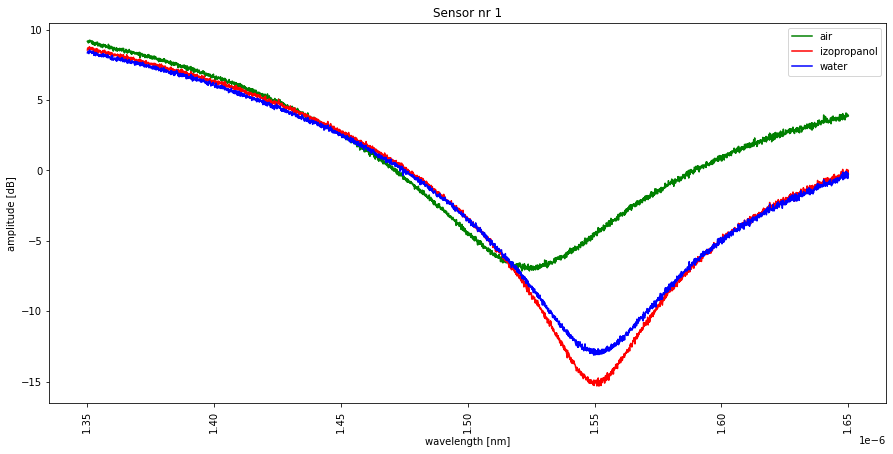

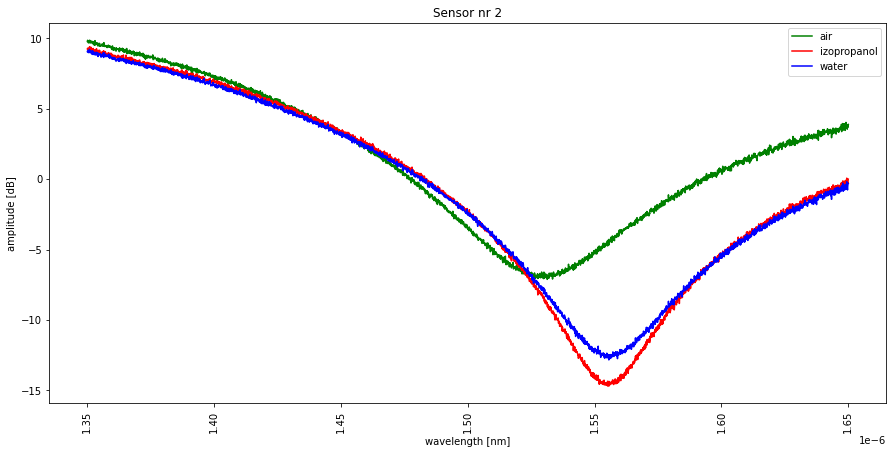

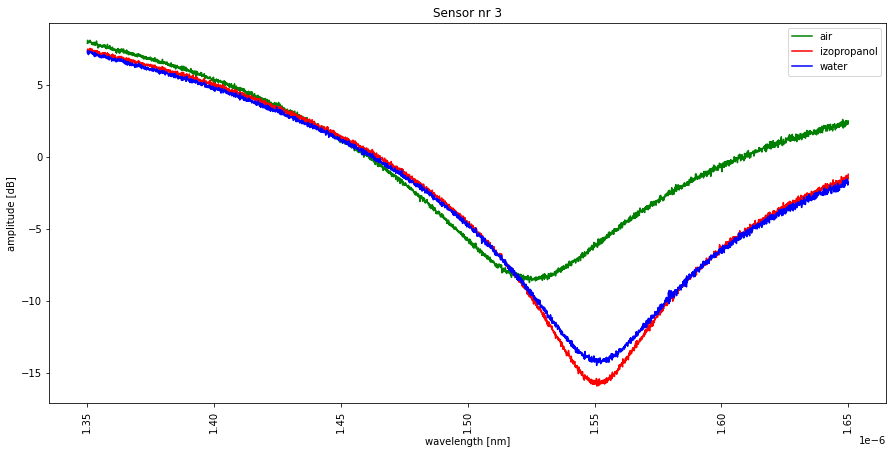

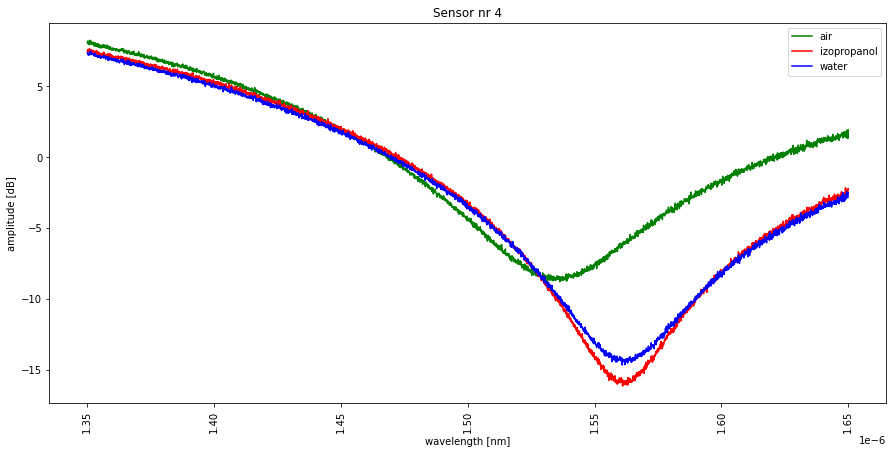

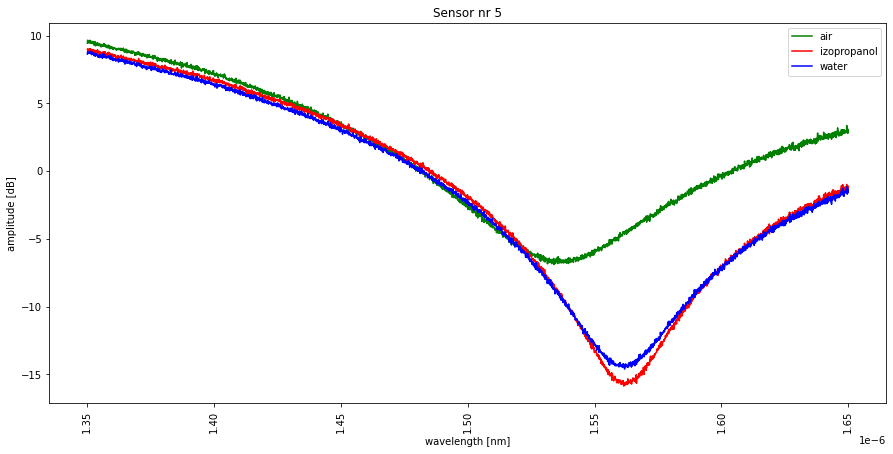

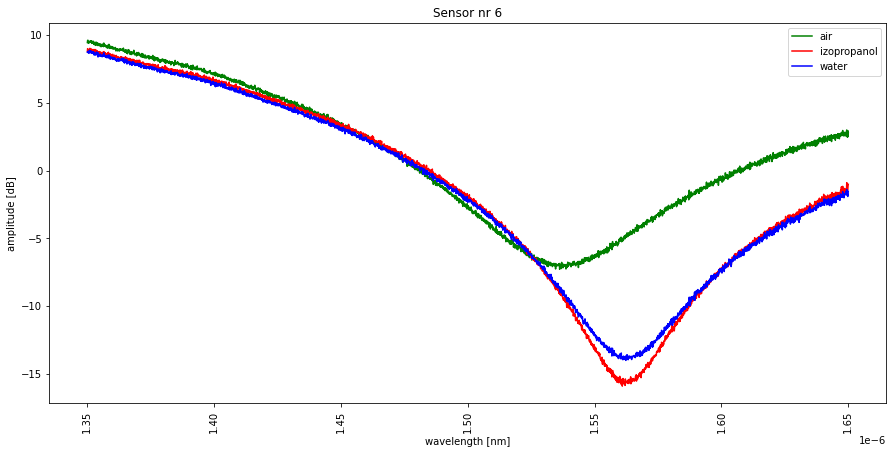

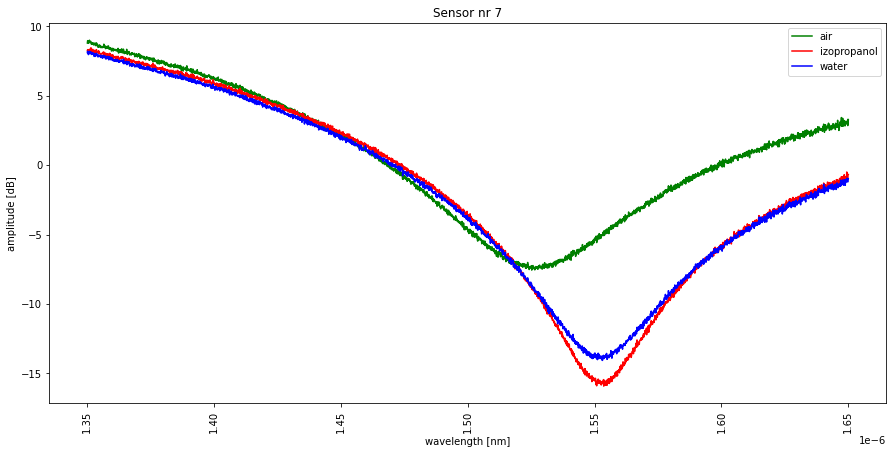

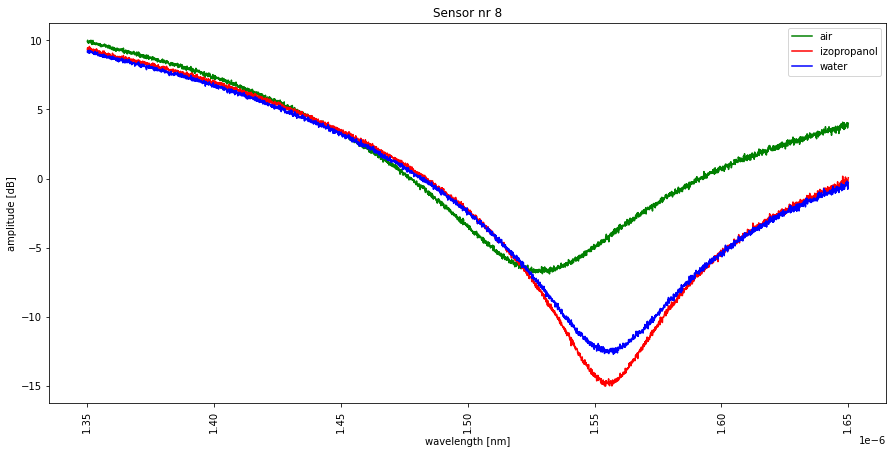

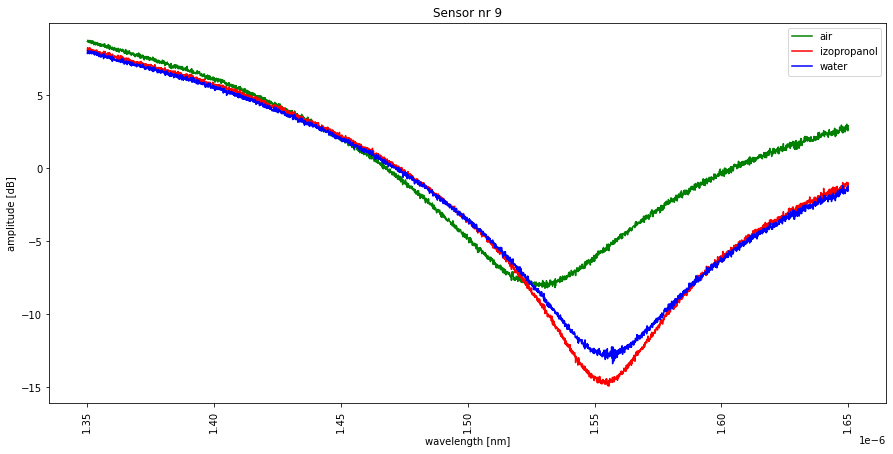

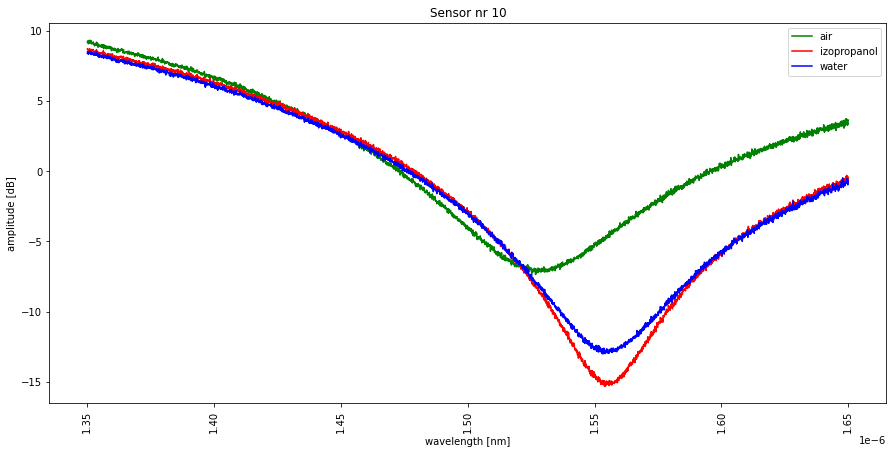

In [300]:
for sesion in range(1,11):
  fig, ax = plt.subplots(figsize=(15,7))
  ax.plot(df_air.loc[:,f'wavelength_air_{sesion}'], df_air.loc[:,f'amplitude_air_{sesion}'], color='green', label = 'air')
  ax.plot(df_izopropanol.loc[:,f'wavelength_izopropanol_{sesion}'], df_izopropanol.loc[:,f'amplitude_izopropanol_{sesion}'], color = 'red', label = 'izopropanol')
  ax.plot(df_water.loc[:,f'wavelength_water_{sesion}'], df_water.loc[:,f'amplitude_water_{sesion}'], color = 'blue', label = 'water')
  ax.xaxis.set_tick_params(rotation=90)
  ax.set_title(f'Sensor nr {sesion}')
  ax.set_xlabel('wavelength [nm]')
  ax.set_ylabel('amplitude [dB]')
  ax.legend()
  plt.show()
  print()

#Prediction model

##Variables

##Train/test split

In [301]:
num = [1,2,3,4,5,6,7,8,9,10]
num_test = random.sample(num, k=2)
num.remove(num_test[0])
num.remove(num_test[1])
print(f'Train sensors number: {num}')
print(f'Test sensor number: {num_test}')

Train sensors number: [2, 3, 5, 6, 7, 8, 9, 10]
Test sensor number: [4, 1]


In [302]:
X_train = pd.DataFrame()
y_train_1 = pd.DataFrame()
y_train_2 = pd.DataFrame()

for item in env:
  for sesion in num:
    if item == 'air':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        X_train = pd.concat([X_train,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        X_train = pd.concat([X_train,df_1], axis="index")
    elif item == 'izopropanol':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_train_1 = pd.concat([y_train_1,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_train_1 = pd.concat([y_train_1,df_1], axis="index")
    elif item == 'water':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_train_2 = pd.concat([y_train_2,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_train_2 = pd.concat([y_train_2,df_1], axis="index")

y_train = pd.concat([y_train_1,y_train_2], axis="columns")

In [303]:
X_train_sorted = pd.concat([X_train,y_train], axis="columns")
X_train_sorted.sort_values(by='wavelength_air', inplace=True)


In [304]:
X_train = X_train_sorted[['wavelength_air', 'amplitude_air']]
y_train = X_train_sorted.drop(columns = ['wavelength_air', 'amplitude_air'])

In [305]:
X_test_1 = pd.DataFrame()
y_test_1_1 = pd.DataFrame()
y_test_2_1 = pd.DataFrame()

sesion = num_test[0]

for item in env:
    if item == 'air':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        X_test_1 = pd.concat([X_test_1,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        X_test_1 = pd.concat([X_test_1,df_1], axis="index")
    elif item == 'izopropanol':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_test_1_1 = pd.concat([y_test_1_1,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_test_1_1 = pd.concat([y_test_1_1,df_1], axis="index")
    elif item == 'water':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_test_2_1 = pd.concat([y_test_2_1,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_test_2_1 = pd.concat([y_test_2_1,df_1], axis="index")

y_test_1 = pd.concat([y_test_1_1,y_test_2_1], axis="columns")

In [306]:
X_test_2 = pd.DataFrame()
y_test_1_2 = pd.DataFrame()
y_test_2_2 = pd.DataFrame()

sesion = num_test[1]

for item in env:
    if item == 'air':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        X_test_2 = pd.concat([X_test_2,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        X_test_2 = pd.concat([X_test_2,df_1], axis="index")
    elif item == 'izopropanol':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_test_1_2 = pd.concat([y_test_1_2,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_test_1_2 = pd.concat([y_test_1_2,df_1], axis="index")
    elif item == 'water':
      if sesion < 10:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_0{sesion}_20/sensor0{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_test_2_2 = pd.concat([y_test_2_2,df_1], axis="index")
      else:
        df_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/AI for the Industry 4.0/Dataset/sesion_{sesion}_20/sensor{sesion}_{item}.txt',
                        names=[f'wavelength_{item}',f'amplitude_{item}'])
        y_test_2_2 = pd.concat([y_test_2_2,df_1], axis="index")

y_test_2 = pd.concat([y_test_1_2,y_test_2_2], axis="columns")

##StandardScaler

In [307]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_train_sc_df1 = pd.DataFrame(data = X_train_sc,
                           columns = X_train.columns,
                           index = X_train.index)

X_test_sc_1 = scaler.transform(X_test_1)
X_test_sc_df_11 = pd.DataFrame(data = X_test_sc_1,
                           columns = X_test_1.columns,
                           index = X_test_1.index)

X_test_sc_2 = scaler.transform(X_test_2)
X_test_sc_df_22 = pd.DataFrame(data = X_test_sc_2,
                           columns = X_test_2.columns,
                           index = X_test_2.index)

##PolynomialFeatures

In [308]:
poly = PolynomialFeatures(degree = 3, interaction_only = False, include_bias = True)
X_train_sc_df = poly.fit_transform(X_train_sc_df1)
X_test_sc_df_1 = poly.transform(X_test_sc_df_11)
X_test_sc_df_2 = poly.transform(X_test_sc_df_22)

##Models

In [309]:
res = pd.DataFrame(columns=['model','r2_1','r2_2','MSE_1','MSE_2'])

###MultiTaskElasticNetCV

Model: MultiTaskElasticNetCV(cv=10, l1_ratio=0.9, random_state=0), Sesion number: 4, R2 score: 0.9893637685886796, MSE: 0.4850198029663918

Model: MultiTaskElasticNetCV(cv=10, l1_ratio=0.9, random_state=0), Sesion number: 1, R2 score: 0.9227405391474856, MSE: 3.384931212630339



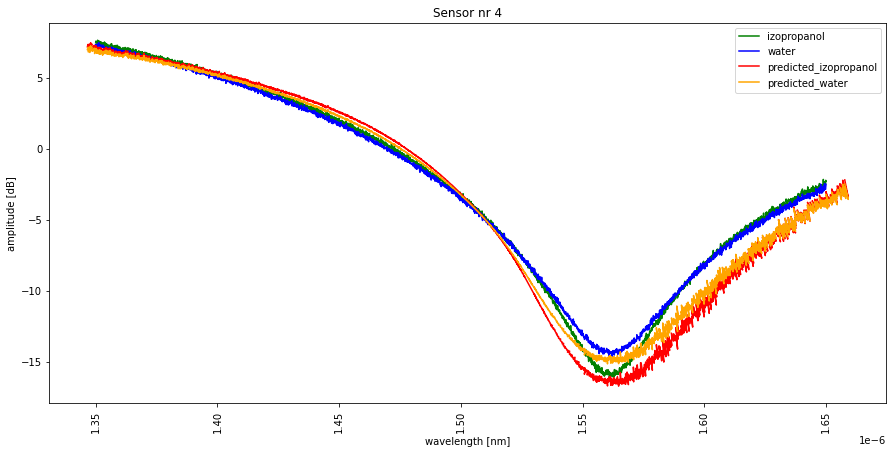

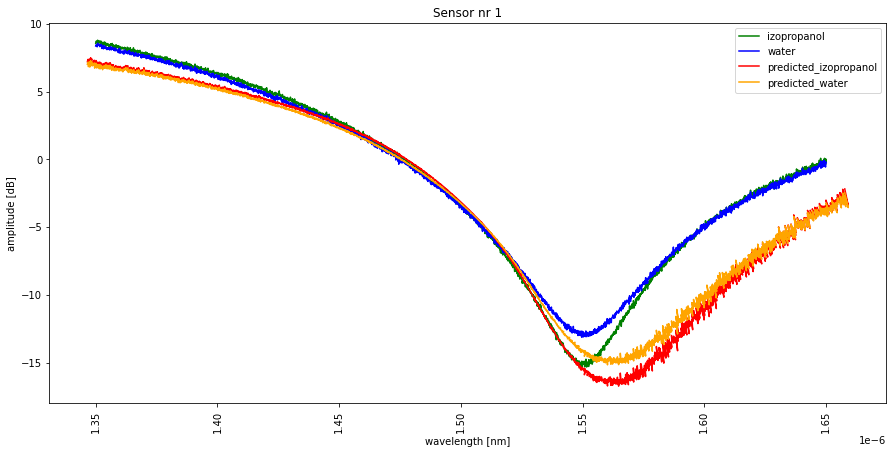

In [310]:
model_1 = MultiTaskElasticNetCV(l1_ratio = 0.9, cv=10, random_state=0)
new_row = prediction_model(model_1, X_train_sc_df, X_test_sc_df_1, X_test_sc_df_1, y_train, y_test_1, y_test_2)
res.loc[len(res)] = new_row

###RandomForestRegressor

Model: RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=3,
                      min_samples_split=8), Sesion number: 4, R2 score: 0.9925169288412925, MSE: 0.2606560948622368

Model: RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=3,
                      min_samples_split=8), Sesion number: 1, R2 score: 0.9556467553255532, MSE: 1.8617068931651475



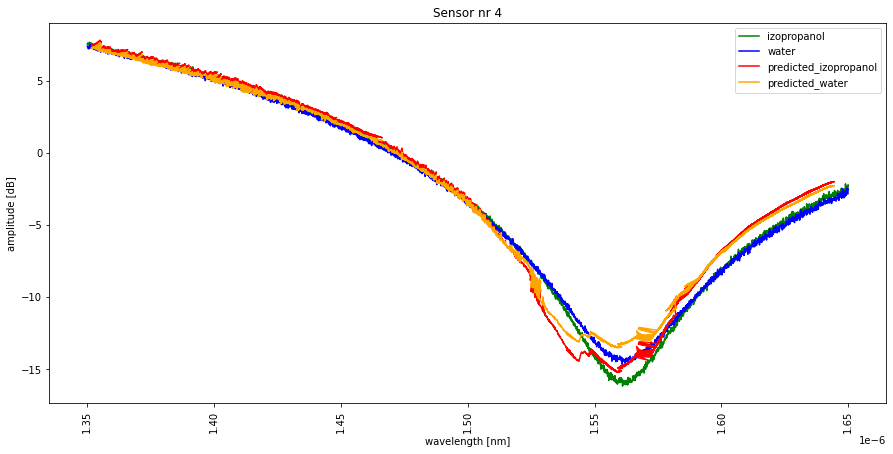

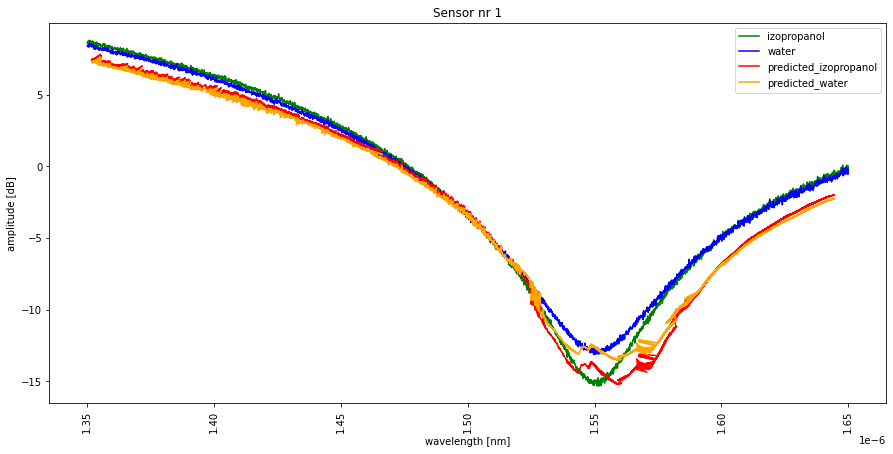

In [311]:
model_2 = RandomForestRegressor(bootstrap= True, max_depth= 80, max_features= 2, min_samples_leaf= 3, 
                                min_samples_split= 8, n_estimators= 100)

new_row = prediction_model(model_2, X_train_sc_df, X_test_sc_df_1, X_test_sc_df_1, y_train, y_test_1, y_test_2)
res.loc[len(res)] = new_row

###KNeighborsRegressor

Model: KNeighborsRegressor(), Sesion number: 4, R2 score: 0.9940655894616637, MSE: 0.23318799575535487

Model: KNeighborsRegressor(), Sesion number: 1, R2 score: 0.9634688094293924, MSE: 1.5652243190829846



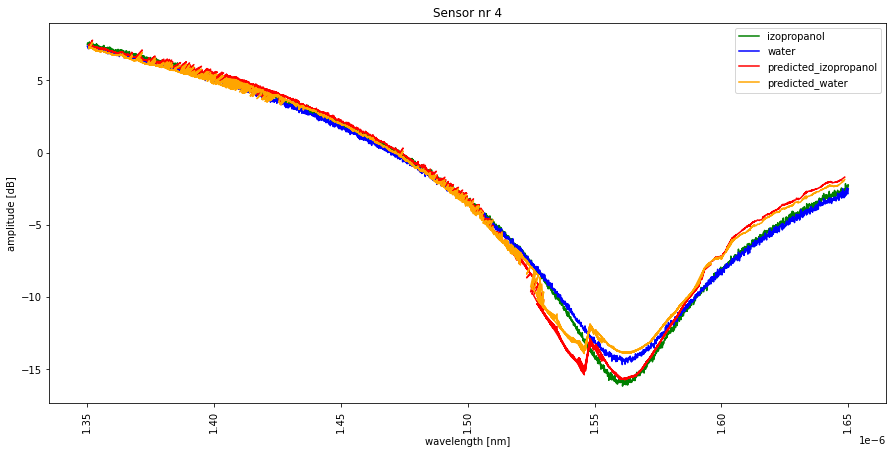

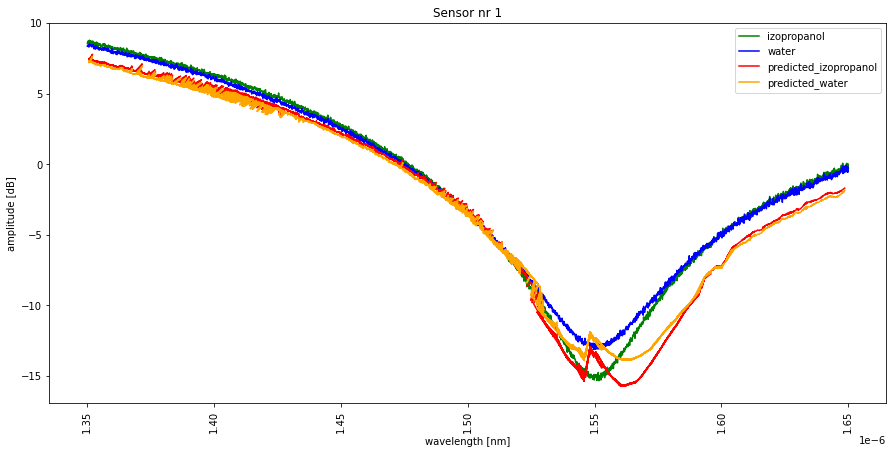

In [312]:
model_3 = KNeighborsRegressor()
new_row = prediction_model(model_3, X_train_sc_df, X_test_sc_df_1, X_test_sc_df_1, y_train, y_test_1, y_test_2)
res.loc[len(res)] = new_row

###LinearRegression

Model: LinearRegression(), Sesion number: 4, R2 score: 0.9891472167012009, MSE: 0.5059081405589784

Model: LinearRegression(), Sesion number: 1, R2 score: 0.9204377475448543, MSE: 3.4898059863321986



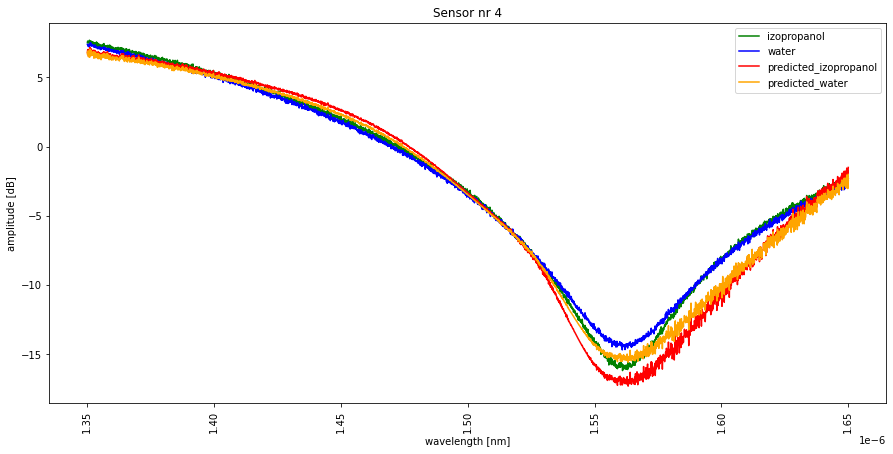

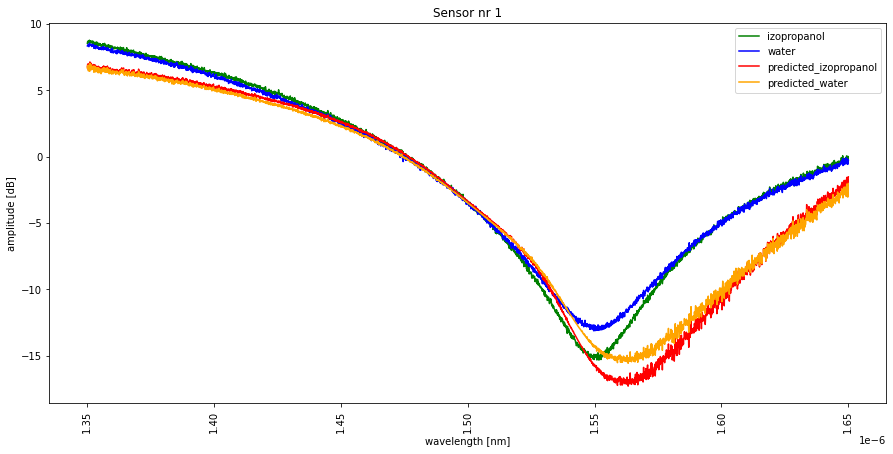

In [313]:
model_4 = LinearRegression()
new_row = prediction_model(model_4, X_train_sc_df, X_test_sc_df_1, X_test_sc_df_1, y_train, y_test_1, y_test_2)
res.loc[len(res)] = new_row

###LinearSVR with MultiOutputRegressor

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: MultiOutputRegressor(estimator=LinearSVR()), Sesion number: 4, R2 score: 0.9898116214302742, MSE: 0.4754276503331649

Model: MultiOutputRegressor(estimator=LinearSVR()), Sesion number: 1, R2 score: 0.9208655365433711, MSE: 3.469285499263915



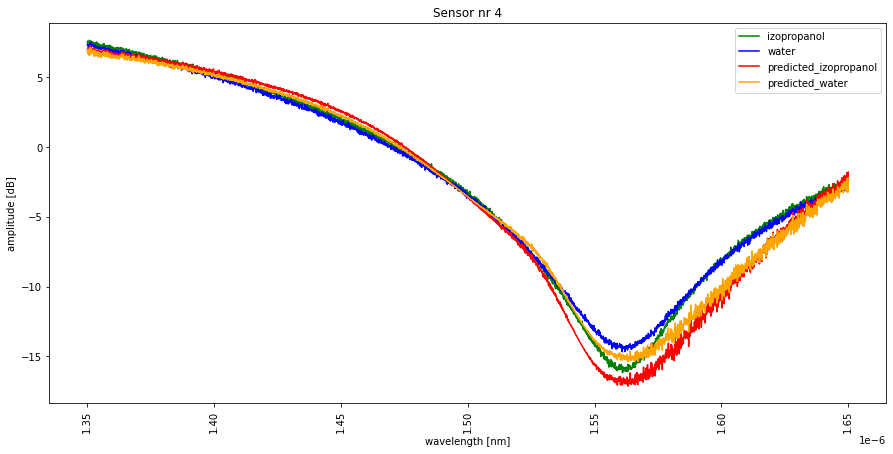

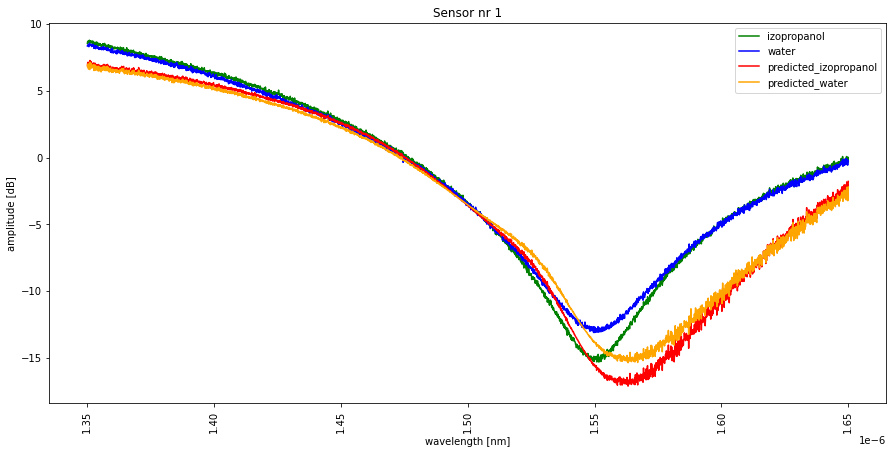

In [314]:
model_5 = LinearSVR()
wrapper = MultiOutputRegressor(model_5)
new_row = prediction_model(wrapper, X_train_sc_df, X_test_sc_df_1, X_test_sc_df_1, y_train, y_test_1, y_test_2)
res.loc[len(res)] = new_row

###LinearSVR with RegressorChain

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: RegressorChain(base_estimator=LinearSVR()), Sesion number: 4, R2 score: 0.9897897100663542, MSE: 0.47584917085384015

Model: RegressorChain(base_estimator=LinearSVR()), Sesion number: 1, R2 score: 0.9214120515380239, MSE: 3.445564946680269



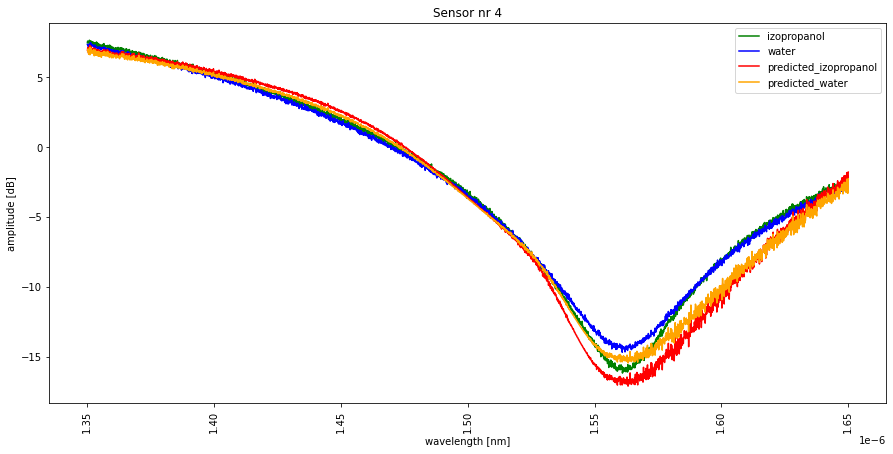

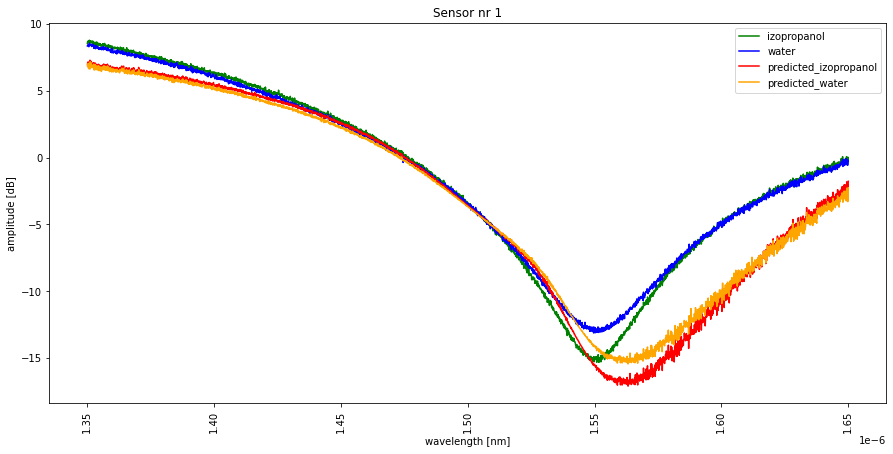

In [315]:
model_6 = LinearSVR()
wrapper = RegressorChain(model_6)
new_row = prediction_model(wrapper, X_train_sc_df, X_test_sc_df_1, X_test_sc_df_1, y_train, y_test_1, y_test_2)
res.loc[len(res)] = new_row

#Summary

In [316]:
display(res)

,model,r2_1,r2_2,MSE_1,MSE_2
0,"MultiTaskElasticNetCV(cv=10, l1_ratio=0.9, ran...",0.989364,0.922741,0.485020,3.384931
1,"(DecisionTreeRegressor(max_depth=80, max_featu...",0.992517,0.955647,0.260656,1.861707
2,KNeighborsRegressor(),0.994066,0.963469,0.233188,1.565224
3,LinearRegression(),0.989147,0.920438,0.505908,3.489806
4,MultiOutputRegressor(estimator=LinearSVR()),0.989812,0.920866,0.475428,3.469285
5,RegressorChain(base_estimator=LinearSVR()),0.989790,0.921412,0.475849,3.445565


In [317]:
results = pd.DataFrame()
results['model'] = res['model']
results['r2'] = (res['r2_1']+res['r2_2'])/2
results['MSE'] = (res['MSE_1']+res['MSE_1'])/2

In [318]:
display(results)

,model,r2,MSE
0,"MultiTaskElasticNetCV(cv=10, l1_ratio=0.9, ran...",0.956052,0.485020
1,"(DecisionTreeRegressor(max_depth=80, max_featu...",0.974082,0.260656
2,KNeighborsRegressor(),0.978767,0.233188
3,LinearRegression(),0.954792,0.505908
4,MultiOutputRegressor(estimator=LinearSVR()),0.955339,0.475428
5,RegressorChain(base_estimator=LinearSVR()),0.955601,0.475849


In [326]:
a_1 = round(results['r2'].max(),4)
a_2 = results[results['r2'] == (results['r2'].max())]
a_3 = results.loc[a.index].iloc[0,0]

b_1 = round(results['MSE'].min(),4)
b_2 = results[results['MSE'] == (results['MSE'].min())]
b_3 = results.loc[c.index].iloc[0,0]

In [327]:
print(f'Max R2 Score: {a_1} for model: {a_3}')
print()
print(f'Min MSE Score: {b_1} for model: {b_3}')

Max R2 Score: 0.9788 for model: RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=3,
                      min_samples_split=8)

Min MSE Score: 0.2332 for model: RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=3,
                      min_samples_split=8)
